In [3]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV


from sklearn.metrics import r2_score
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '%.5f' % x)
estate_train = pd.read_csv('Downloads/Project_1/train.csv')
estate_test = pd.read_csv('Downloads/Project_1/test.csv')
estate_train = estate_train.rename(columns={'Helthcare_2': 'Healthcare_2'})
estate_test = estate_test.rename(columns={'Helthcare_2': 'Healthcare_2'})
estate_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Price
count,10000.00000,10000.00000,10000.00000,10000.00000,7887.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,5202.00000,10000.00000,10000.00000,10000.00000
mean,8383.40770,50.40080,1.89050,56.31578,37.19964,6.27330,8.52670,12.60940,3990.16630,0.11886,24.68700,5352.15740,8.03920,1142.90446,1.31950,4.23130,214138.85740
std,4859.01902,43.58759,0.83951,21.05873,86.24121,28.56092,5.24115,6.77597,200500.26143,0.11903,17.53261,4006.79980,23.83187,1021.51726,1.49360,4.80634,92872.29387
min,0.00000,0.00000,0.00000,1.13686,0.37062,0.00000,1.00000,0.00000,1910.00000,0.00000,0.00000,168.00000,0.00000,0.00000,0.00000,0.00000,59174.77803
25%,4169.50000,20.00000,1.00000,41.77488,22.76983,1.00000,4.00000,9.00000,1974.00000,0.01765,6.00000,1564.00000,0.00000,350.00000,0.00000,1.00000,153872.63394
50%,8394.50000,36.00000,2.00000,52.51331,32.78126,6.00000,7.00000,13.00000,1977.00000,0.07542,25.00000,5285.00000,2.00000,900.00000,1.00000,3.00000,192269.64488
75%,12592.50000,75.00000,2.00000,65.90063,45.12880,9.00000,12.00000,17.00000,2001.00000,0.19578,36.00000,7227.00000,5.00000,1548.00000,2.00000,6.00000,249135.46217
max,16798.00000,209.00000,19.00000,641.06519,7480.59213,2014.00000,42.00000,117.00000,20052011.00000,0.52187,74.00000,19083.00000,141.00000,4849.00000,6.00000,23.00000,633233.46657


In [4]:
print(estate_train.shape[0], estate_train.shape[1])
print(estate_test.shape[0], estate_test.shape[1])

10000 20
5000 19


In [5]:
estate_train['Healthcare_2']

0       0
1       1
2       3
3       0
4       0
       ..
9995    1
9996    0
9997    1
9998    3
9999    3
Name: Healthcare_2, Length: 10000, dtype: int64

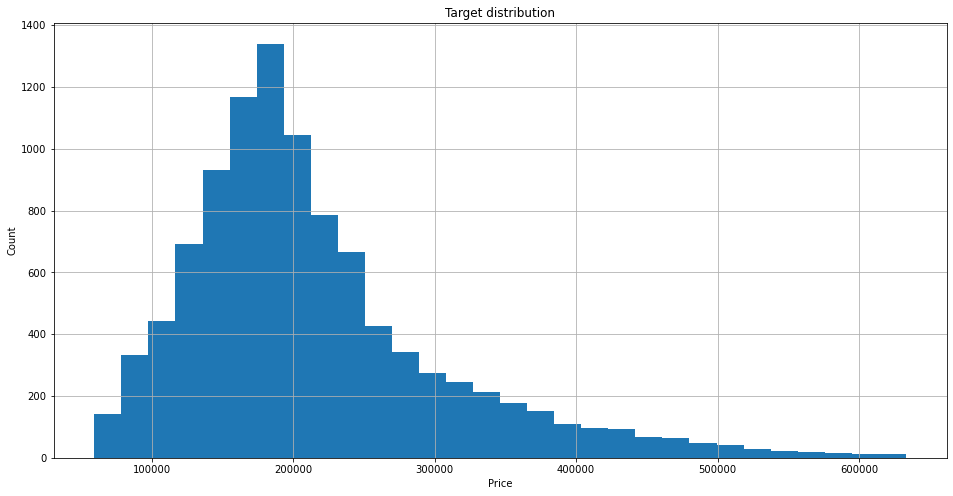

In [6]:
plt.figure(figsize = (16,8))
estate_train['Price'].hist(bins = 30)
plt.ylabel('Count')
plt.xlabel('Price')
plt.title('Target distribution')
plt.show()

In [7]:
estate_train.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Healthcare_2       int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [8]:
estate_train.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Healthcare_2        0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [9]:
estate_train.drop('Healthcare_1', axis = 1, inplace = True)

In [10]:
X = estate_train

In [11]:
X.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_2,Shops_1,Price
count,10000.00000,10000.00000,10000.00000,10000.00000,7887.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,8383.40770,50.40080,1.89050,56.31578,37.19964,6.27330,8.52670,12.60940,3990.16630,0.11886,24.68700,5352.15740,8.03920,1.31950,4.23130,214138.85740
std,4859.01902,43.58759,0.83951,21.05873,86.24121,28.56092,5.24115,6.77597,200500.26143,0.11903,17.53261,4006.79980,23.83187,1.49360,4.80634,92872.29387
min,0.00000,0.00000,0.00000,1.13686,0.37062,0.00000,1.00000,0.00000,1910.00000,0.00000,0.00000,168.00000,0.00000,0.00000,0.00000,59174.77803
25%,4169.50000,20.00000,1.00000,41.77488,22.76983,1.00000,4.00000,9.00000,1974.00000,0.01765,6.00000,1564.00000,0.00000,0.00000,1.00000,153872.63394
50%,8394.50000,36.00000,2.00000,52.51331,32.78126,6.00000,7.00000,13.00000,1977.00000,0.07542,25.00000,5285.00000,2.00000,1.00000,3.00000,192269.64488
75%,12592.50000,75.00000,2.00000,65.90063,45.12880,9.00000,12.00000,17.00000,2001.00000,0.19578,36.00000,7227.00000,5.00000,2.00000,6.00000,249135.46217
max,16798.00000,209.00000,19.00000,641.06519,7480.59213,2014.00000,42.00000,117.00000,20052011.00000,0.52187,74.00000,19083.00000,141.00000,6.00000,23.00000,633233.46657


In [12]:
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians=None
        self.ecology_1_quantile = None
        self.social_1_quantile = None
        self.social_2_quantile = None
        self.social_3_quantile = None
        self.healthcare_2_quantile = None
        
    def fit(self, X):
        """Сохранение статистик"""  
        
        # Расчет медиан
        
        self.medians = X.median()
        
        # Квантили
        
        self.ecology_1_quantile = X['Ecology_1'].quantile(.975) 
        self.social_1_quantile = X['Social_1'].quantile(.975)
        self.social_2_quantile = X['Social_2'].quantile(.975)
        self.social_3_quantile = X['Social_3'].quantile(.975)
        self.healthcare_2_quantile = X['Healthcare_2'].quantile(.975)
    
    def transform(self, X):
        """Трансформация данных"""

        # Rooms
        
        X['Rooms_outlier'] = 0
        X.loc[(X['Rooms'] == 0) | (X['Rooms'] > 5), 'Rooms_outlier'] = 1
        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        X.loc[X['Rooms'] > 5, 'Rooms'] = self.medians['Rooms']
        
        #Square
        
        X['Square_outlier'] = 0
        X.loc[(X['Square'] < 15) | (X['Square'] > 200), 'Square_outlier'] = 1
        X.loc[X['Square'] < 15, 'Square'] = self.medians['Square']
        X.loc[X['Square'] > 200, 'Square'] = self.medians['Square']
        
        #Lifesquare
        
        X['LifeSquare_outlier'] = 0
        X.loc[(X['LifeSquare'] < 10) | (X['LifeSquare'] > X['Square']), 'LifeSquare_outlier'] = 1
        X.loc[(X['LifeSquare'] < 10), 'LifeSquare'] = self.medians['LifeSquare']
        X.loc[(X['LifeSquare'] > X['Square']), 'LifeSquare'] = self.medians['Square']
        X.loc[(X['LifeSquare'].isna()), 'LifeSquare'] = self.medians['LifeSquare']
        
        
        
        # KitchenSquare
        
        X['Kitchen_outlier'] = 0
        X.loc[(X['KitchenSquare'] < 5) | (X['KitchenSquare'] > X['LifeSquare'])  | (X['KitchenSquare'] > X['Square']) | (X['KitchenSquare'] > 30), 'Kitchen_outlier'] = 1
        X.loc[X['KitchenSquare'] < 5, 'KitchenSquare'] = 5
        X.loc[(X['KitchenSquare'] > X['LifeSquare']), 'KitchenSquare'] = self.medians['KitchenSquare']
        X.loc[X['KitchenSquare'] > X['Square'], 'KitchenSquare'] = self.medians['KitchenSquare']
        X.loc[(X['KitchenSquare'] > 30), 'KitchenSquare'] = 30
        
        # HouseFloor, Floor
        
        X['Floor_outlier'] = 0
        X.loc[(X['Floor'] == 0 ) | (X['Floor'] > X['HouseFloor']), 'Floor_outlier'] = 1
        X.loc[(X['Floor'] == 0 ) , 'Floor' ] = 1
        X.loc[ (X['Floor'] > X['HouseFloor']), 'Floor' ] = X['HouseFloor']
        
        
        # HouseYear
        
        X['Year_outlier'] = 0
        X.loc[(X['HouseYear'] < 1920 ) | (X['HouseYear'] > 2023), 'Year_outlier'] = 1
        X.loc[(X['HouseYear']  < 1920 ) , 'HouseYear' ] = self.medians['HouseYear']
        X.loc[(X['HouseYear']  > 2023 ) , 'HouseYear' ] = self.medians['HouseYear']
        
        # Healthcare_1
        
        if 'Healthcare_1' in X.columns:
            X.drop('Healthcare_1', axis=1, inplace=True)
            
        # LifeSquare
        
        
        
        X.fillna(self.medians, inplace=True)
        
        
        return X

In [13]:
class FeatureGenetator():
    """Генерация новых фич"""
    
    def __init__(self):
        self.dummies = None
        self.ratio_square = None
        
    def fit(self, X, y=None):
        
        X = X.copy()
        
        # Binary features
        
        self.dummies = {'A': 0, 'B': 1}
        
        ## Ratio_square
        
       
        self.ratio_square = (estate_train['LifeSquare']/estate_train['Square'])

    def transform(self, X):
        
        # Binary features
        X['Ecology_2'] = X['Ecology_2'].map(self.dummies)  # self.binary_to_numbers = {'A': 0, 'B': 1}
        X['Ecology_3'] = X['Ecology_3'].map(self.dummies)
        X['Shops_2'] = X['Shops_2'].map(self.dummies)
        
      
        
        
        
        return X
    

In [14]:
feature_names = ['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
       'Healthcare_2', 'Shops_1', 'Shops_2', 'Price', 'Rooms_outlier',
       'Square_outlier', 'LifeSquare_outlier', 'Kitchen_outlier',
       'Floor_outlier', 'Year_outlier', 'Ratio_square']

target_name = 'Price'

In [15]:
X = estate_train.drop(columns = 'Price')
y = estate_train['Price']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.33, shuffle = True, random_state = 42)

In [16]:
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
estate_test = preprocessor.transform(estate_test)

X_train.shape, X_valid.shape, estate_test.shape

((6700, 24), (3300, 24), (5000, 24))

In [17]:
features_gen = FeatureGenetator()
features_gen.fit(X_train, y_train)

X_train = features_gen.transform(X_train)
X_valid = features_gen.transform(X_valid)
estate_test = features_gen.transform(estate_test)

X_train.shape, X_valid.shape, estate_test.shape

((6700, 24), (3300, 24), (5000, 24))

In [18]:
rf_model = RandomForestRegressor(random_state=42, criterion='mse')
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [19]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_valid)

In [20]:
r2_score (y_train, y_train_preds)

0.960774289472883

In [21]:
r2_score (y_valid, y_test_preds)

0.7200392523125418